In [1]:
#obspy
from obspy import UTCDateTime
from obspy.taup import TauPyModel
model = TauPyModel(model="iasp91")
#rtergpy (Andy's code)
from rtergpy.run import defaults, event, etime2name
from rtergpy.waveforms import getwaves, get_respinv
#attenuation (Hiba's code)
from AttenuationFunctions import processANSS, filtering, maxamp_calc, organize_data, maxamp_plot

In [2]:
# Processing and Reading information about event stored in ANSS_data.txt
Defaults = defaults()
Event = event()
Defaults.src="RASPISHAKE"
Defaults.network="AM"
Defaults.chan="EHZ"
Defaults.stationrange=[1.,10.]
Event.ecount='00'
Event.iter='RS'
Event.newData = False   # use already downloaded data
edateold=""
ANSS = processANSS() 
for index, EQ in ANSS.iterrows():
    network = "AM"
    chan = "EHZ"
    src = "RASPISHAKE"
    rads = [1.,10.]
    eloc = [EQ.Latitude,EQ.Longitude,EQ.Depth] 
    MagType = [EQ.Mtype]
    MagValue = [EQ.Mag]
    Magnitude = [MagType, MagValue]
    year,mo,dy = EQ.Date.split('-')
    hh,mn,sec = EQ.Time.split(':')
    etime=(UTCDateTime(int(year),int(mo),int(dy),int(hh),int(mn),float(sec)))
    if EQ.Date == edateold:
        Event.ecount=str(int(Event.ecount)+1).zfill(2)
    else:
        Event.ecount='00'
    edateold=EQ.Date
    Event.eventname=etime2name(etime,ecount=Event.ecount)
    Event.origin=[eloc,etime]
    print("\n\n"+Event.eventname+" ===============================")
    try:
        st, df = [], []
        st, df = getwaves(Defaults=Defaults,Event=Event)
    except:
        print("ERROR: running on "+Event.eventname+" failed!!!!\n\n") 



2022012400 ===============================
ERROR:  coudn't move directory to  /Users/hkunwer/Documents/research/EQenergy/events/2022/2022012400/RS.bak
Error:  Couldn't create directory:  /Users/hkunwer/Documents/research/EQenergy/events/2022/2022012400/RS
Checking for stations available within range from IRIS
Getting waves from RASPISHAKE


  0%|                                                    | 0/28 [00:00<?, ?it/s]

10.0 18.4578 -73.3389 18.52252252 -72.24929548


  4%|█▌                                          | 1/28 [00:01<00:32,  1.20s/it]

10.0 18.4578 -73.3389 25.92792793 -80.41194326


  7%|███▏                                        | 2/28 [00:02<00:27,  1.06s/it]

10.0 18.4578 -73.3389 25.88288288 -80.36355577


 11%|████▋                                       | 3/28 [00:03<00:24,  1.01it/s]

10.0 18.4578 -73.3389 18.12612613 -67.10740855


 14%|██████▎                                     | 4/28 [00:04<00:24,  1.02s/it]

10.0 18.4578 -73.3389 25.93693694 -80.33003527


 18%|███████▊                                    | 5/28 [00:05<00:23,  1.02s/it]

10.0 18.4578 -73.3389 18.45945946 -66.34149666


 21%|█████████▍                                  | 6/28 [00:06<00:21,  1.01it/s]

10.0 18.4578 -73.3389 18.44144144 -66.00258091


 25%|███████████                                 | 7/28 [00:07<00:21,  1.01s/it]

10.0 18.4578 -73.3389 18.01801802 -66.83860199


 29%|████████████▌                               | 8/28 [00:08<00:20,  1.01s/it]

10.0 18.4578 -73.3389 18.45945946 -69.90366697


 32%|██████████████▏                             | 9/28 [00:08<00:18,  1.05it/s]

AM.R4EEE.00.EHZ failed to download. Continuing..
10.0 18.4578 -73.3389 18.97297297 -69.03229849


 36%|███████████████▎                           | 10/28 [00:09<00:16,  1.09it/s]

AM.R54B1.00.EHZ failed to download. Continuing..
10.0 18.4578 -73.3389 25.91891892 -80.32294168


 39%|████████████████▉                          | 11/28 [00:10<00:16,  1.04it/s]

10.0 18.4578 -73.3389 18.45945946 -67.11405725


 43%|██████████████████▍                        | 12/28 [00:11<00:14,  1.09it/s]

AM.R804D.00.EHZ failed to download. Continuing..
10.0 18.4578 -73.3389 25.9009009 -80.35088029


 46%|███████████████████▉                       | 13/28 [00:12<00:14,  1.06it/s]

10.0 18.4578 -73.3389 19.81981982 -70.72312982


 50%|█████████████████████▌                     | 14/28 [00:13<00:13,  1.03it/s]

10.0 18.4578 -73.3389 19.76576577 -72.19072395


 54%|███████████████████████                    | 15/28 [00:14<00:11,  1.09it/s]

AM.RA887.00.EHZ failed to download. Continuing..
10.0 18.4578 -73.3389 18.20720721 -66.22838073


 57%|████████████████████████▌                  | 16/28 [00:15<00:11,  1.05it/s]

10.0 18.4578 -73.3389 25.97297297 -80.37233493


 61%|██████████████████████████                 | 17/28 [00:16<00:10,  1.04it/s]

10.0 18.4578 -73.3389 25.99099099 -80.33726338


 64%|███████████████████████████▋               | 18/28 [00:17<00:09,  1.03it/s]

10.0 18.4578 -73.3389 25.93693694 -80.33003527


 68%|█████████████████████████████▏             | 19/28 [00:18<00:08,  1.01it/s]

10.0 18.4578 -73.3389 17.99099099 -66.61079735


 71%|██████████████████████████████▋            | 20/28 [00:19<00:08,  1.01s/it]

10.0 18.4578 -73.3389 18.08108108 -67.03136089


 75%|████████████████████████████████▎          | 21/28 [00:20<00:06,  1.05it/s]

AM.RD17E.00.EHZ failed to download. Continuing..
10.0 18.4578 -73.3389 19.77477477 -72.22637702


 79%|█████████████████████████████████▊         | 22/28 [00:21<00:05,  1.11it/s]

AM.RD269.00.EHZ failed to download. Continuing..
10.0 18.4578 -73.3389 18.1981982 -71.1000091


 82%|███████████████████████████████████▎       | 23/28 [00:22<00:04,  1.14it/s]

AM.RD4D8.00.EHZ failed to download. Continuing..
10.0 18.4578 -73.3389 18.36036036 -66.17987632


 86%|████████████████████████████████████▊      | 24/28 [00:23<00:03,  1.06it/s]

10.0 18.4578 -73.3389 18.27927928 -66.33100902


 89%|██████████████████████████████████████▍    | 25/28 [00:23<00:02,  1.10it/s]

AM.RD66A.00.EHZ failed to download. Continuing..
10.0 18.4578 -73.3389 18.41441441 -68.93603553


 93%|███████████████████████████████████████▉   | 26/28 [00:25<00:02,  1.22s/it]

AM.RE001.00.EHZ failed to download. Continuing..
10.0 18.4578 -73.3389 18.30630631 -66.07594445


 96%|█████████████████████████████████████████▍ | 27/28 [00:26<00:01,  1.17s/it]

10.0 18.4578 -73.3389 18.08108108 -67.04209886


100%|███████████████████████████████████████████| 28/28 [00:27<00:00,  1.01it/s]

AM.S897D.00.EHZ failed to download. Continuing..
rPtime =  60.0
Trace SNR =  33507.00153670628 1


Trace SNR =  1.9535977173105086 2
Trace SNR =  1.1190312407952294 3
Trace SNR =  480.8589546770031 4
Trace SNR =  1.4192637527994663 5
Trace SNR =  82.47129498163677 6
Trace SNR =  1.29898385468013 7
Trace SNR =  191.81053272544594 8
Trace SNR =  1.3713020620842287 9
Trace SNR =  0.9804724314212754 10
Trace SNR =  13951.268120281064 11
Trace SNR =  175.1629656881115 12
Trace SNR =  1.427339646787087 13
Trace SNR =  1.2224276212058625 14
Trace SNR =  1.4254295476506453 15
Trace SNR =  3.306360285749013 16
Trace SNR =  6.006171446784444 17
Trace SNR =  2.625076714997328 18
6  of  18 traces were kept above SNR threshold 10.0
writing  /Users/hkunwer/Documents/research/EQenergy/events/2022/2022012400/RS/pkls/Params_2022012400.pkl 
 /Users/hkunwer/Documents/research/EQenergy/events/2022/2022012400/RS/Params_2022012400.csv
writing  /Users/hkunwer/Documents/research/EQenergy/events/2022/2022012400/RS/pkls/Wavestream-raw_2022012400.pkl


In [3]:
eventID = (str(etime)+Event.iter+Event.ecount) # creates unique event name
inventory = get_respinv(network,eloc,etime,rads,chan,src) # make an inventory incase needed.

In [4]:
stp = filtering(st) # filter stream for instrument response and taper

In [5]:
df_freq = maxamp_calc(stp, eventID) #calculate max amps and dist for each tr at freq bands

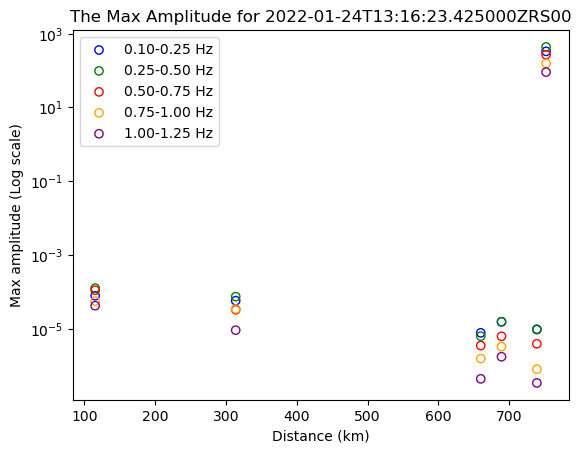

In [6]:
organize_data(df_freq, EQ, etime, eloc, eventID) #creates dataframe of all results
maxamp_plot(eventID,df_freq) #plots maxamps vs distance